In [5]:
# IMPORT NECCESSERY LIB
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import math
import xgboost as xgb
import operator

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

In [7]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train.shape

(4209, 378)

In [9]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
df_test_ID= df_test['ID'] 
df_test_ID

0          1
1          2
2          3
3          4
4          5
        ... 
4204    8410
4205    8411
4206    8413
4207    8414
4208    8416
Name: ID, Length: 4209, dtype: int64

In [10]:
df_test.shape

(4209, 377)

In [11]:
## Identifying and converting the categorical variables into dummy variables,to avoid giving as int values to algorithm.
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('int64'): Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
        ...
        'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
        'X385'],
       dtype='object', length=369),
 dtype('float64'): Index(['y'], dtype='object'),
 dtype('O'): Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')}

In [12]:
df_train_obj = df_train.select_dtypes(include=[object])
df_train_obj

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [13]:
LE = LabelEncoder();
for feature in df_train_obj.columns:
    df_train[feature] = LE.fit_transform(df_train[feature])
    df_test[feature] = LE.fit_transform(df_test[feature]) 

In [14]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


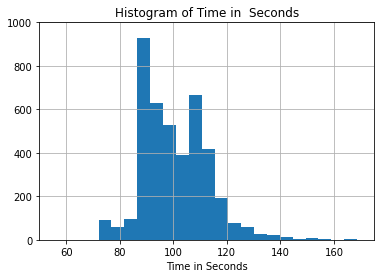

In [16]:
plt.hist(df_train.y, bins = 40)
plt.xlabel('Time in Seconds')
plt.title('Histogram of Time in  Seconds')
plt.grid(True)
plt.axis([50,175, 0,1000])
plt.show()

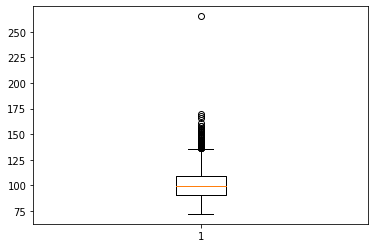

In [17]:
#observe outliners
Box_Plt = plt.boxplot(df_train.y)
plt.show()

In [18]:
df_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [19]:
# To find out the columns having only 1 unique value throughout and dropping those
remove_unwanted = list()
for i in range(len(df_train.columns)):
    if(len(np.unique(df_train.iloc[:,i])) == 1):
        remove_unwanted.append(df_train.columns[i])
        
df_train.drop(remove_unwanted,axis = 1, inplace = True)
df_train.shape

(4209, 366)

In [20]:
df_test.drop(remove_unwanted,axis = 1, inplace = True)

In [21]:
df_test.shape

(4209, 365)

In [22]:
df_train_x = df_train.drop(['ID','y'], axis = 1)
df_train_x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_train_y = df_train.y
df_train_y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [24]:
final_id = df_test.ID
final_id

0          1
1          2
2          3
3          4
4          5
        ... 
4204    8410
4205    8411
4206    8413
4207    8414
4208    8416
Name: ID, Length: 4209, dtype: int64

In [25]:
df_test = df_test.drop('ID', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.3, random_state=24)
print(X_train, X_test, y_train, y_test)

      X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  ...  X375  X376  X377  X378  \
3761  45   1   8   0   3  25   6  14    0    1  ...     0     0     1     0   
1472  23  25   2   2   3   2   9  10    0    0  ...     0     0     0     0   
3023  35   6  16   2   3  21   9  12    0    0  ...     0     0     1     0   
1408  24   7  14   3   3   2   0   8    0    0  ...     1     0     0     0   
2208  31   3  16   2   3  15   2  21    0    0  ...     0     0     1     0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...   ...   ...   ...   ...   
4079  40   1   7   2   3  19   0  21    0    0  ...     0     0     1     0   
2193  19  10  16   2   3  15   9  10    0    0  ...     0     0     1     0   
3473   8  20  16   6   3  22   6  15    0    0  ...     1     0     0     0   
343    8  20  16   6   3  13   8  20    0    0  ...     1     0     0     0   
899   38  20  16   2   3   6   9   2    0    0  ...     0     0     1     0   

      X379  X380  X382  X383  X384  X385  
3761    

In [26]:
## Linear Regression with the entire data
model = LinearRegression()
model.fit(df_train_x,df_train_y)
result = model.predict(df_train_x)

MSE = mean_squared_error(df_train_y, result)
print("Mean Squared Error:")
print(MSE)

print("Root Mean Squared Error:")
print(math.sqrt(MSE))

print("R-squared :")
print(r2_score(df_train_y, result))

Mean Squared Error:
65.53683342483865
Root Mean Squared Error:
8.095482284882022
R-squared :
0.5922513566587686


In [27]:
residual = df_train_y - result
residual

0       -0.018613
1       -9.097258
2        2.929128
3        0.776555
4       -3.704243
          ...    
4204     0.265549
4205    -0.672871
4206    -3.284913
4207    -3.525707
4208    13.410944
Name: y, Length: 4209, dtype: float64

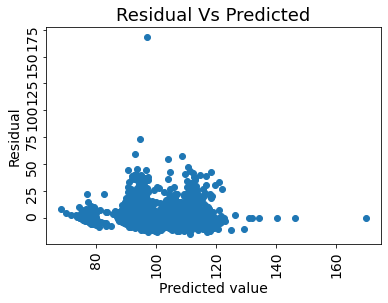

In [28]:
plt.scatter(result,residual)
plt.xlabel("Predicted value", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Residual Vs Predicted", fontsize=18)
plt.xticks(fontsize= 14, rotation=90)
plt.yticks(fontsize= 14, rotation=90)
plt.show()

In [29]:
df_train.shape

(4209, 366)

In [30]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_train_x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## standardize the data
SS = StandardScaler()
SS.fit(df_train_x)
df_train_std = SS.transform(df_train_x)
df_test_std = SS.transform(df_test) 
pca = PCA(n_components= 0.9) 

In [33]:
pca.fit(df_train_std)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
df_train_trans = pca.transform(df_train_std)
df_train_trans

array([[ 1.22544667e+01, -2.94420951e+00, -9.57849872e-01, ...,
        -2.38452317e-01,  1.57149321e-02,  5.92542200e-01],
       [-1.02545670e-01,  3.66061642e-01,  9.97224047e-01, ...,
         2.02061763e+00, -8.70471856e-01, -8.05464469e-01],
       [ 1.02783182e+01,  2.11049278e+01, -5.01329942e+00, ...,
         1.22760233e+00, -7.23170970e+00,  1.51068534e+00],
       ...,
       [ 4.36968281e-01,  8.97529347e-01,  3.44522225e+00, ...,
         2.85431038e-01,  3.80993992e-01,  2.28184399e-01],
       [-1.34167187e+00,  5.89252655e-01, -1.09654887e-01, ...,
         6.95513563e-01,  5.21780063e-01, -1.73411994e-01],
       [-2.16821336e+00, -1.06043018e+00, -2.88075121e-01, ...,
         8.85970255e-02, -1.06010426e-01,  6.15201466e-01]])

In [35]:
df_test_trans = pca.transform(df_test_std)
df_test_trans

array([[ 8.47915689, 19.65340787, -6.18456843, ..., -1.10313456,
        -0.72307019,  2.22477577],
       [ 1.83530378, -5.70610119, -9.47235672, ..., -0.56301195,
        -0.37760955,  2.38179929],
       [ 6.06975058, 16.55981863, -3.7741444 , ..., -1.24457725,
         1.13954972,  1.14859541],
       ...,
       [-2.69359358,  0.65167397,  3.14946883, ..., -0.44198811,
         1.03362092,  0.36568649],
       [-1.30840939,  0.2562844 ,  4.0632018 , ..., -0.15530501,
        -0.20018795,  0.44778074],
       [-1.4135608 , -2.01623705, -3.33539688, ...,  0.47243354,
         0.15693168,  0.83607674]])

In [36]:
#after PCA transformation
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_train_trans, df_train_y, test_size=0.3, random_state=123)
print(X_train1, X_test1, y_train1, y_test1)

[[-1.28135501 -0.8673283  -2.07600558 ... -0.37839138  0.13952188
  -0.77274627]
 [-1.50689655  0.04651508 -1.1255591  ...  0.06860211 -0.04211482
  -0.09638925]
 [-2.15666175 -1.51889041 -3.85048383 ...  0.39340411  0.0071451
  -0.01026362]
 ...
 [-1.93762635 -2.70376444 -5.42464502 ... -0.39642755  0.02867721
   0.5699965 ]
 [-1.34566593  0.32234132  3.87237402 ...  0.23703649 -0.64225935
  -1.09904052]
 [-1.92821456  0.59891959 -1.12370261 ... -0.45031433 -0.09272533
   1.48140479]] [[ 0.39227106  0.90141663  3.40356371 ... -0.07718707  0.29134839
   0.350757  ]
 [-0.8955181  -1.06639533 -2.19564563 ... -0.0371155   0.46029471
   0.77315005]
 [-2.45910366 -3.42725853 -6.1115816  ... -0.08159043  0.38458739
  -0.1566138 ]
 ...
 [ 0.44471233 -0.10872317  1.5976522  ... -1.78577517 -0.41067327
  -0.52144528]
 [-1.65442026  1.71917365  6.15750733 ... -0.19755652  0.10821929
   0.80627696]
 [-1.62876612 -2.96624786 -2.97863986 ... -0.71494623 -0.49738472
   0.17422129]] 4052     87.33
30

In [37]:
## Linear Regression with train-test split data standardize
model_1 = LinearRegression()
model_1.fit(X_train1,y_train1)
result_1 = model_1.predict(X_test1)

MSE_1 = mean_squared_error(y_test1,result_1)
print("Mean Squared Error:")
print(MSE_1)

print("Root Mean Squared Error:")
print(math.sqrt(MSE_1))

print("R-squared :")
print(r2_score(y_test1, result_1))

residual_1 = y_test1 - result_1
residual_1

Mean Squared Error:
79.24563566437467
Root Mean Squared Error:
8.902001778497613
R-squared :
0.4968249429852697


1259    -7.318747
1793    -8.262601
2720     0.752359
2024     2.430356
3578    -8.104526
          ...    
2362    -7.450086
3382    -3.770457
3404   -14.538863
1464    -8.897387
2316    -3.343983
Name: y, Length: 1263, dtype: float64

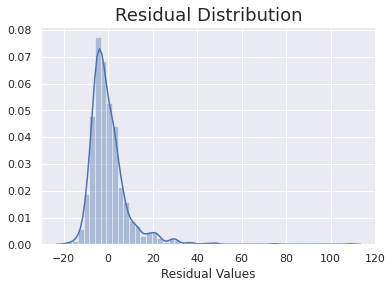

In [38]:
sns.set(color_codes=True)
sns.distplot(residual_1)
plt.xlabel("Residual Values")
plt.title("Residual Distribution", fontsize =18)
plt.show()

In [39]:
## XGBoost with the entire data
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 6, "seed": 42, "silent": 1}
xgb_params

{'objective': 'reg:linear',
 'eta': 0.01,
 'max_depth': 6,
 'seed': 42,
 'silent': 1}

In [40]:
## XGBoost with train-test split
num_rounds = 1000
d_train = xgb.DMatrix(X_train1, label=y_train1)
d_test = xgb.DMatrix(X_test1)
modelxg = xgb.train(xgb_params, d_train, num_rounds, feval =r2_score)
importance = modelxg.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

result_xg = modelxg.predict(d_test)

mse = mean_squared_error(y_test1, result_xg)
print("Mean Squared Error:")
print(mse)

print("Root Mean Squared Error:")
print(math.sqrt(mse))

print("R-squared :")
print(r2_score(y_test1, result_xg))

residual_xg = y_test1 - result_xg
residual_xg

Mean Squared Error:
77.46348232415988
Root Mean Squared Error:
8.801334121834024
R-squared :
0.5081408356657129


1259    -5.859582
1793    -6.182097
2720     2.164654
2024     3.617503
3578   -10.526183
          ...    
2362   -11.205693
3382    -5.961691
3404   -12.430167
1464    -9.620690
2316    -1.334361
Name: y, Length: 1263, dtype: float64

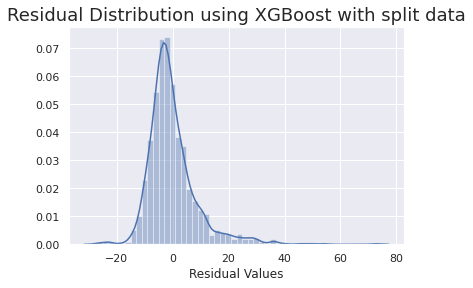

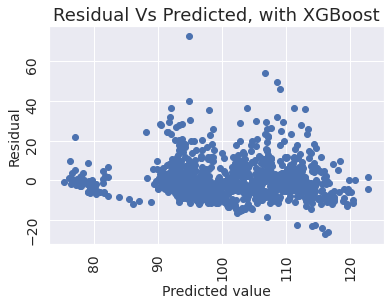

In [41]:
sns.set(color_codes=True)
sns.distplot(residual_xg)
plt.xlabel("Residual Values")
plt.title("Residual Distribution using XGBoost with split data", fontsize =18)
plt.show()

plt.scatter(result_xg,residual_xg)
plt.xlabel("Predicted value", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Residual Vs Predicted, with XGBoost", fontsize=18)
plt.xticks(fontsize= 14, rotation=90)
plt.yticks(fontsize= 14, rotation=90)
plt.show()

In [54]:
#predicting for test.csv
## XGBoost with test dataframe 

df_test1 = xgb.DMatrix(df_test_trans)
df_test_predict= modelxg.predict(df_test1)
df_test_predict

array([ 94.785576, 122.33812 ,  92.35861 , ...,  94.16141 , 110.913994,
        95.345825], dtype=float32)